### HDCS Fall 22 internship - Stage E Graded Quiz
Time series Analysis & Forecast - Electricity prices

**Author: Zakaria Jnayni**
### Import the required libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")
df.shape, df.columns

((92016, 5),
 Index(['FullDate', 'Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [ ]:
df["FullDate"] = pd.to_datetime(df["FullDate"]) #convert to datetime
df.set_index("FullDate", inplace= True)

**Q1**: Which of the following best describes stationarity? 
* 3.The standard deviation and the mean does not change over time.

**Q2**: In The augmented Dickey-Fuller unit root test, a P value of < 0.05 suggests that ___? 
* 4.The time series is stationary

**Q3**: The Log differencing data transformation technique is used to remove __ & __ from a time series Data?
* 4.Trend & Seasonality

**Q4**: Which time series forecasting model involves the linear combination of past time series values of the target variable to predict future values?
* 4.Autocorrelation Model

**Q5**: Which of these is a method employed in performing a train test split on a time series dataset?
* 4.Sliding window

**Q6**: In the Arima time series forecasting model, the parameters ‘pdq’ represents____?
* 3.Number of past time steps, Number of non-seasonal Differences, Past Errors/REsiduals

**Q7**: Which of these imputation methods is not suitable for a time series data that is to be used for modeling?
* 2.Filling with a very large integer value
* 3.Backward Fill

**Q8**: Which of these is not a behaviour exhibited by a time series data?
* 2.Linearity

**Q9**: The time series model of order ___ states that the current time series value is linearly dependent on the past p values with some white noise?
* 2.AR, order p

**Q10** The ___ model of order ___ says that the time series is linearly dependent on current and past shock values or noise?
* 2.MA model, order q

**Q11**: Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?
* .1

In [ ]:
#Downsample data points 
daily_df = df.resample('D').sum()
daily_df.shape

(3834, 4)

Text(0, 0.5, 'Electricity Price')

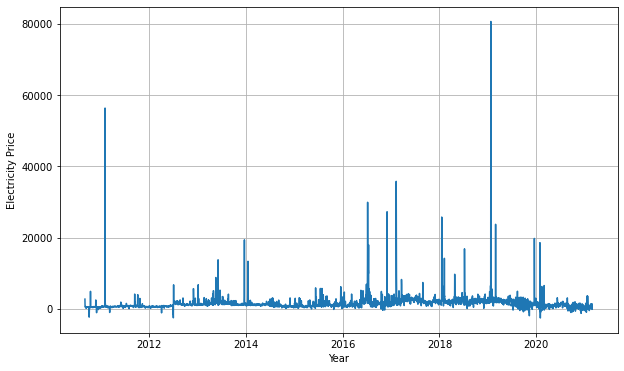

In [ ]:
plt.figure(figsize=( 10, 6))

plt.plot(daily_df.index, daily_df.ElecPrice)
#plt.plot(MA)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Electricity Price')

**Q12**: Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?
* 2. (0.004254, 0.045027)

In [ ]:
# ADF test for stationarity
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(daily_df.SysLoad) 
print(f'ADF Statistic: {adf_result[0]}') 
print(f'p-value: {adf_result[1]}') 
print(f'No. of lags used: {adf_result[2]}') 
print(f'No. of observations used : {adf_result[3]}') 
print('Critical Values:')
 
for k, v in adf_result[4].items():
    print(f'{k} : {v}')

ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117
No. of lags used: 30
No. of observations used : 3803
Critical Values:
1% : -3.432070672988693
5% : -2.8623002987378547
10% : -2.567174716967499


In [ ]:
# ADF test for stationarity
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(daily_df.GasPrice) 
print(f'ADF Statistic: {adf_result[0]}') 
print(f'p-value: {adf_result[1]}') 
print(f'No. of lags used: {adf_result[2]}') 
print(f'No. of observations used : {adf_result[3]}') 
print('Critical Values:')
 
for k, v in adf_result[4].items():
    print(f'{k} : {v}')

ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542
No. of lags used: 27
No. of observations used : 3806
Critical Values:
1% : -3.4320693157877544
5% : -2.8622996992165364
10% : -2.5671743978048323


**Q13**: Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?
* 3. (-2.5672, -2.8623)

In [ ]:
# ADF test for stationarity
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(daily_df.ElecPrice) 
print(f'ADF Statistic: {adf_result[0]}') 
print(f'p-value: {adf_result[1]}') 
print(f'No. of lags used: {adf_result[2]}') 
print(f'No. of observations used : {adf_result[3]}') 
print('Critical Values:')
 
for k, v in adf_result[4].items():
    print(f'{k} : {v}')

ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


**Q14**: Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?
* 3. (542.54) but it shows (544.72)

**Q15**: What is the RMSE in 2 decimal places?
* 1. (3208.04)

In [ ]:
daily_df.reset_index(inplace=True)
daily_df = daily_df.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y", 'Tmax':'add1', 'SysLoad':'add2', 'GasPrice':'add3'})

In [ ]:
# Create Training and Test
daily_train = daily_df[:2757]
daily_test = daily_df[2757:]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_b8lx56l/cifav2ci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_b8lx56l/qqp6off4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6052', 'data', 'file=/tmp/tmp_b8lx56l/cifav2ci.json', 'init=/tmp/tmp_b8lx56l/qqp6off4.json', 'output', 'file=/tmp/tmp_b8lx56l/prophet_model6y9ou5wf/prophet_model-20230120011252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:12:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:12:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


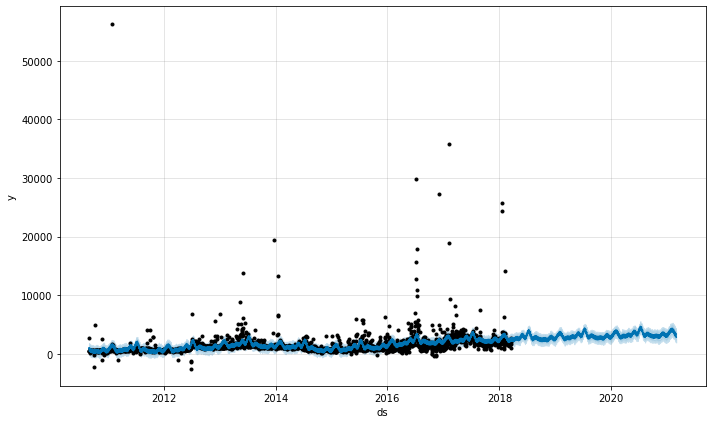

In [ ]:
from prophet import Prophet

model = Prophet(interval_width=0.3)
model.fit(daily_train)
 
#predict for next days
future = model.make_future_dataframe(periods= 1077 , freq= 'D') 
forecast = model.predict(future)

#show df
forecast.head() 

#plot the predictions
model.plot(forecast)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(daily_test.y, forecast["yhat"][2757:]))
mae = mean_absolute_error(daily_test.y, forecast["yhat"][2757:])
mape = np.mean(np.abs((daily_test.y - forecast["yhat"][2757:]) / daily_test.y)) * 100

print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)

RMSE: 3208.0625067777974
MAE: 1731.9703063637687
MAPE: 544.7254323999416


**Q16**: If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?
* 1. July

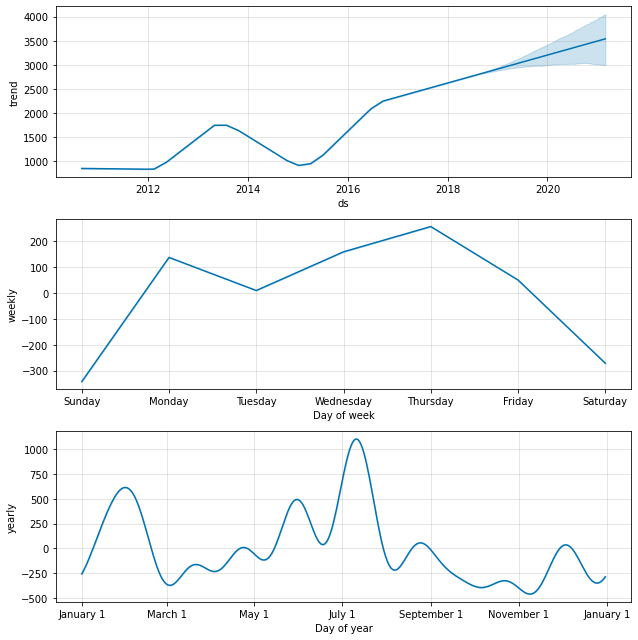

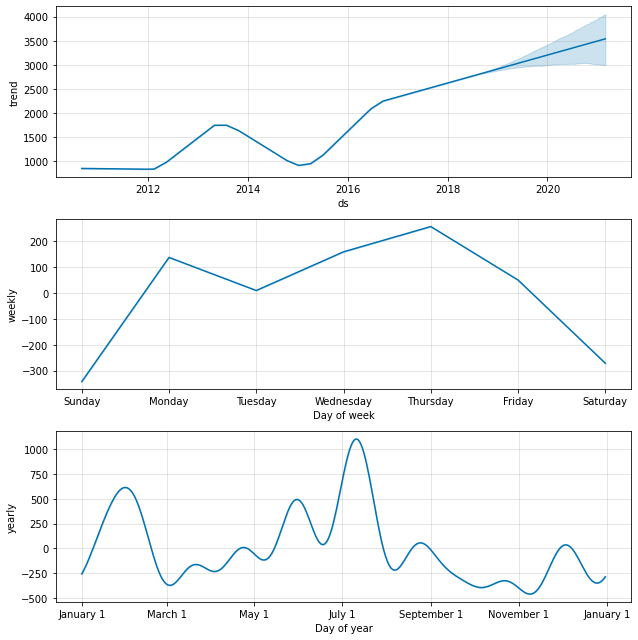

In [ ]:
model.plot_components(forecast)

**Q17**: Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?
* 4. (233.83) but it shows (233.98)

**Q18**: What is the RMSE in 2 decimal places?
* 3. (2709.65)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_b8lx56l/0_b4d01h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_b8lx56l/0iwh47c5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64719', 'data', 'file=/tmp/tmp_b8lx56l/0_b4d01h.json', 'init=/tmp/tmp_b8lx56l/0iwh47c5.json', 'output', 'file=/tmp/tmp_b8lx56l/prophet_models4r6lfoa/prophet_model-20230120011300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:13:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:13:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


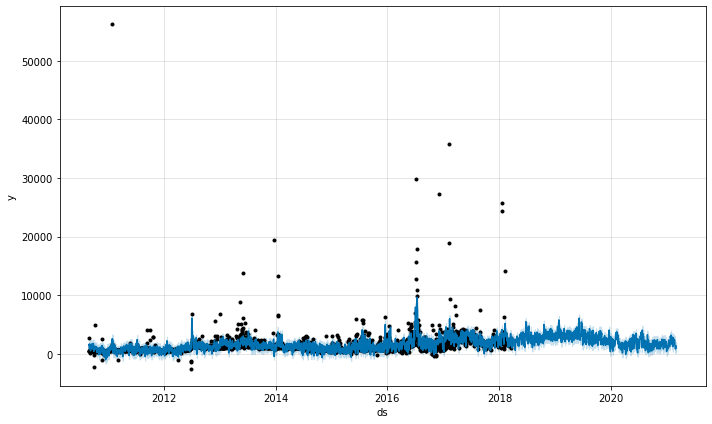

In [ ]:
from prophet import Prophet

model = Prophet(interval_width=0.3)

#add regressors
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

#fit
model.fit(daily_train)
 
#predict for the next days 
future = model.make_future_dataframe(periods= 1077 , freq= 'D')

if(daily_df.shape[0] != future.shape[0]):
    raise ValueError("The size of the daily_df and future dataframe do not match")

future["add1"] = daily_df["add1"]
future["add2"] = daily_df["add2"]
future["add3"] = daily_df["add3"]
 
forecast = model.predict(future) 
forecast.head() 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']] 

#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries 
model.plot(forecast)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(daily_test.y, forecast["yhat"][2757:]))
mae = mean_absolute_error(daily_test.y, forecast["yhat"][2757:])
mape = np.mean(np.abs((daily_test.y - forecast["yhat"][2757:]) / daily_test.y)) * 100

print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)

RMSE: 2709.8683926297576
MAE: 993.5455057546291
MAPE: 233.98035864053352


**Q19**: If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?
* 1.Thursday

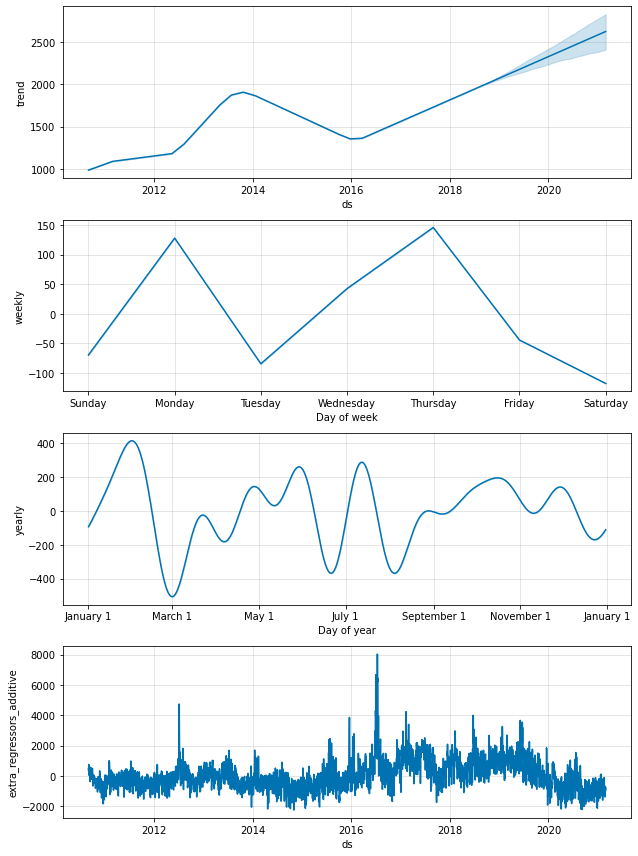

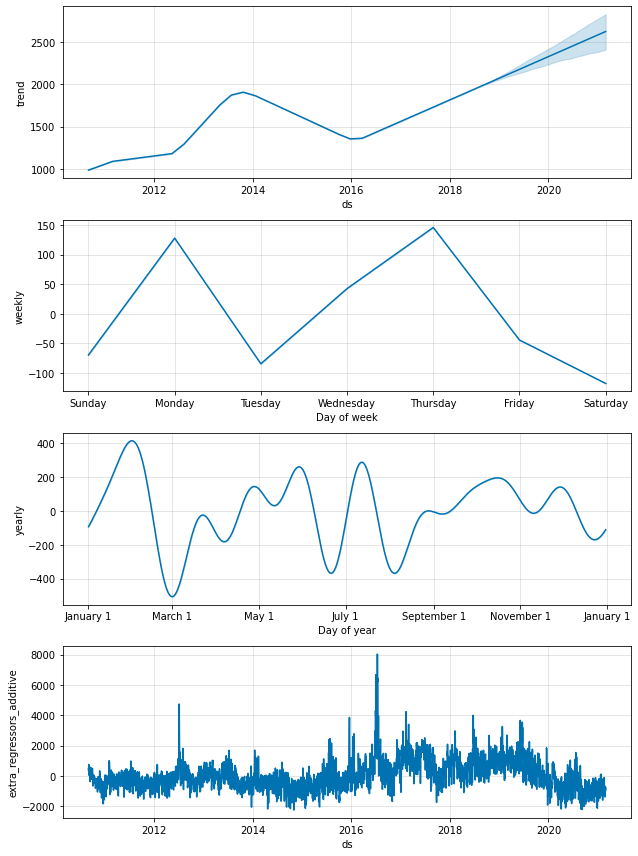

In [ ]:
model.plot_components(forecast)

**Q20**: (drop T-max), what is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?
* 2.(236.66) it shows (235.10)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_b8lx56l/q6mbji7j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_b8lx56l/w8oz5wz8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71400', 'data', 'file=/tmp/tmp_b8lx56l/q6mbji7j.json', 'init=/tmp/tmp_b8lx56l/w8oz5wz8.json', 'output', 'file=/tmp/tmp_b8lx56l/prophet_modelqv5by3jj/prophet_model-20230120011309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:13:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:13:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


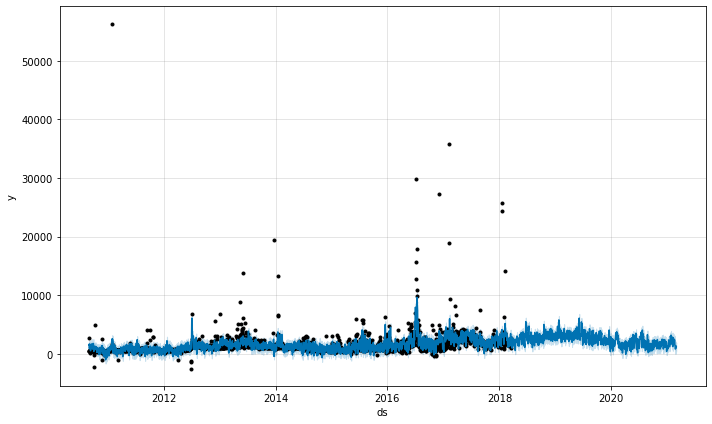

In [ ]:
from prophet import Prophet

model = Prophet(interval_width=0.3)

#add regressors
#model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

#fit
model.fit(daily_train)
 
#predict for the next days 
future = model.make_future_dataframe(periods= 1077 , freq= 'D')

if(daily_df.shape[0] != future.shape[0]):
    raise ValueError("The size of the daily_df and future dataframe do not match")

#future["add1"] = daily_df["add1"]
future["add2"] = daily_df["add2"]
future["add3"] = daily_df["add3"]
 
forecast = model.predict(future) 
forecast.head() 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']] 

#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries 
model.plot(forecast)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(daily_test.y, forecast["yhat"][2757:]))
mae = mean_absolute_error(daily_test.y, forecast["yhat"][2757:])
mape = np.mean(np.abs((daily_test.y - forecast["yhat"][2757:]) / daily_test.y)) * 100

print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)

RMSE: 2711.2075860053083
MAE: 997.6384277950376
MAPE: 235.10628166869742
